# Load packages

In [3]:
import DrivAER as dv
import scanpy as sc
import pandas as pd
import numpy as np
import anndata as ad
import umap
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.ensemble import RandomForestClassifier as RFC
import statsmodels.api as sm
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
sc.set_figure_params(vector_friendly=True,dpi_save=300,transparent=True)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/compat/pandas.py:23: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


## Erythrocyte trajectory

In [7]:
count1 = sc.read("./Paul_Ery.txt",sep="\t",first_column_names=True,cache=True)
pt1 = pd.to_numeric(count1.obs_names)
C3_mouse = dv.get_anno(filename="C3.gmt",transfer=True)

In [11]:
my_counter = 0
res1 = dv.enrich_test(count = count1, pheno = pt1, tf_targets = C3_mouse[1:10], 
                           min_targets=5, datatype = "continuous")

1 / 7


Using TensorFlow backend.
W1108 15:32:06.772684 4613551552 deprecation_wrapper.py:119] From /Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/kopt/config.py:60: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  _config = yaml.load(open(_config_path))
W1108 15:32:07.348150 4613551552 deprecation_wrapper.py:119] From /Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/dca/api.py:146: The name tf.set_random_seed is deprecated. Please use tf.compat.v1.set_random_seed instead.

W1108 15:32:07.407961 4613551552 deprecation_wrapper.py:119] From /Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-pack

DCA: Successfully preprocessed 21 genes and 1254 cells.


W1108 15:32:07.588716 4613551552 deprecation_wrapper.py:119] From /Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W1108 15:32:07.994757 4613551552 deprecation_wrapper.py:119] From /Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W1108 15:32:08.030431 4613551552 deprecation.py:323] From /Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/dca/loss.py:10: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Calculating low dimensional representations...
Calculating reconstructions...
2 / 7
DCA: Successfully preprocessed 17 genes and 1254 cells.
Calculating low dimensional representations...
Calculating reconstructions...
3 / 7
DCA: Successfully preprocessed 17 genes and 1254 cells.
Calculating low dimensional representations...
Calculating reconstructions...
4 / 7
DCA: Successfully preprocessed 12 genes and 1254 cells.
Calculating low dimensional representations...
Calculating reconstructions...
5 / 7
DCA: Successfully preprocessed 20 genes and 1254 cells.
Calculating low dimensional representations...
Calculating reconstructions...
6 / 7
DCA: Successfully preprocessed 12 genes and 1254 cells.
Calculating low dimensional representations...
Calculating reconstructions...
7 / 7
DCA: Successfully preprocessed 13 genes and 1254 cells.
Calculating low dimensional representations...
Calculating reconstructions...


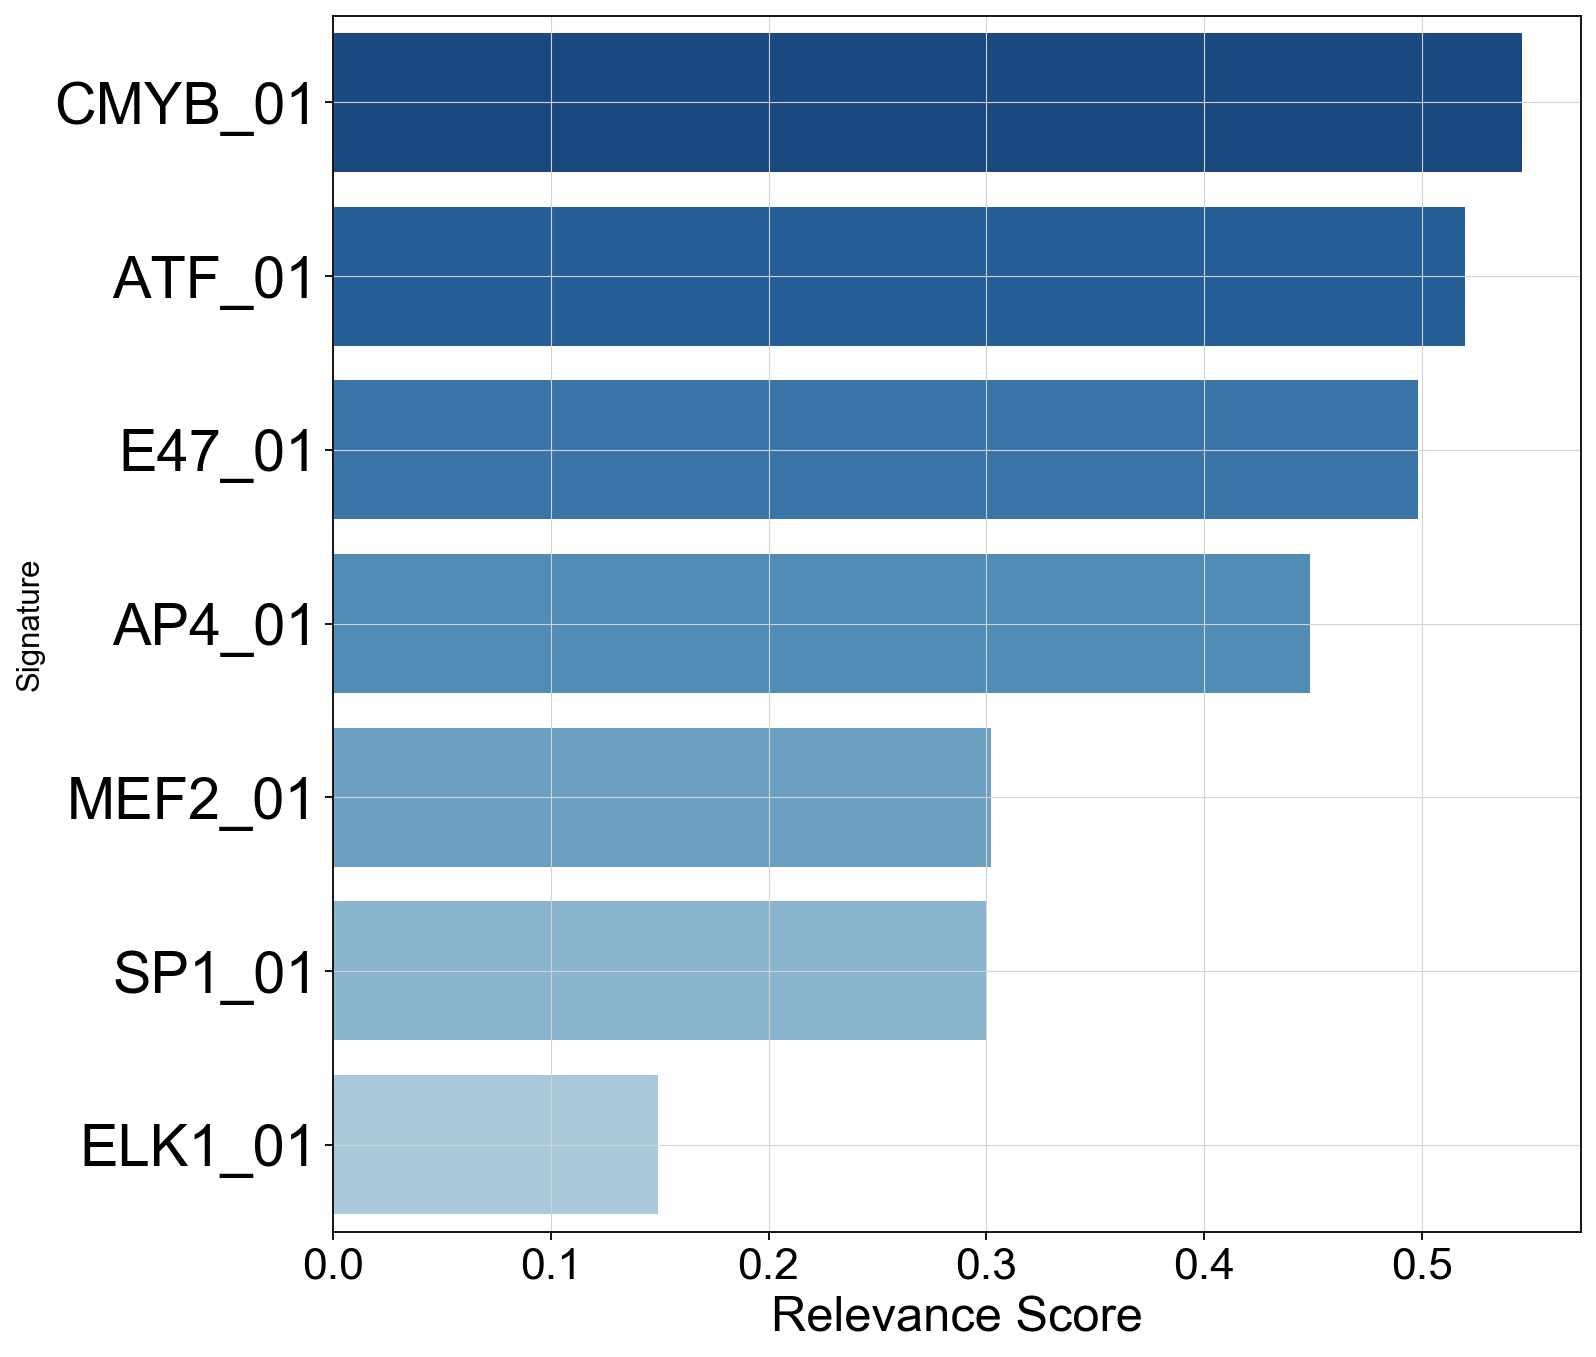

Top_TF : ['CMYB_01', 'ATF_01', 'E47_01', 'AP4_01', 'MEF2_01']
Worse_TF : ['E47_01', 'AP4_01', 'MEF2_01', 'SP1_01', 'ELK1_01']


In [13]:
dv.rank_plot(result=res1,save=False)

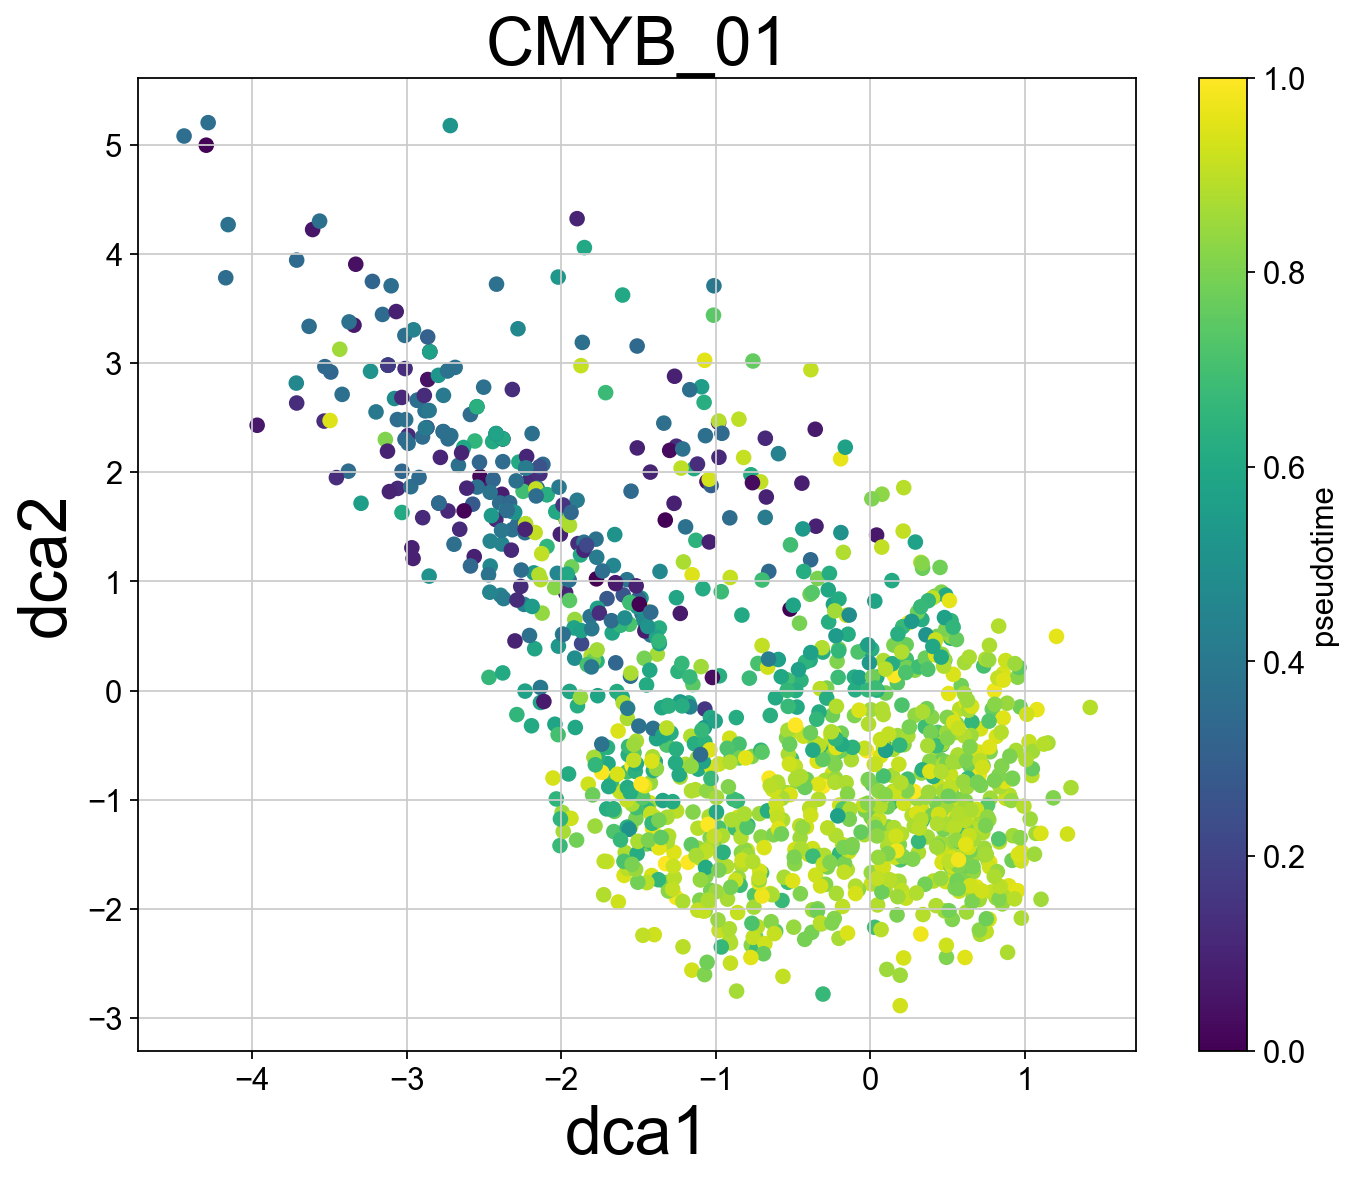

In [14]:
dv.enrich_plot_tf(result=res1, tf_name="CMYB_01", pheno=pt1, datatype="continuous", save=False)

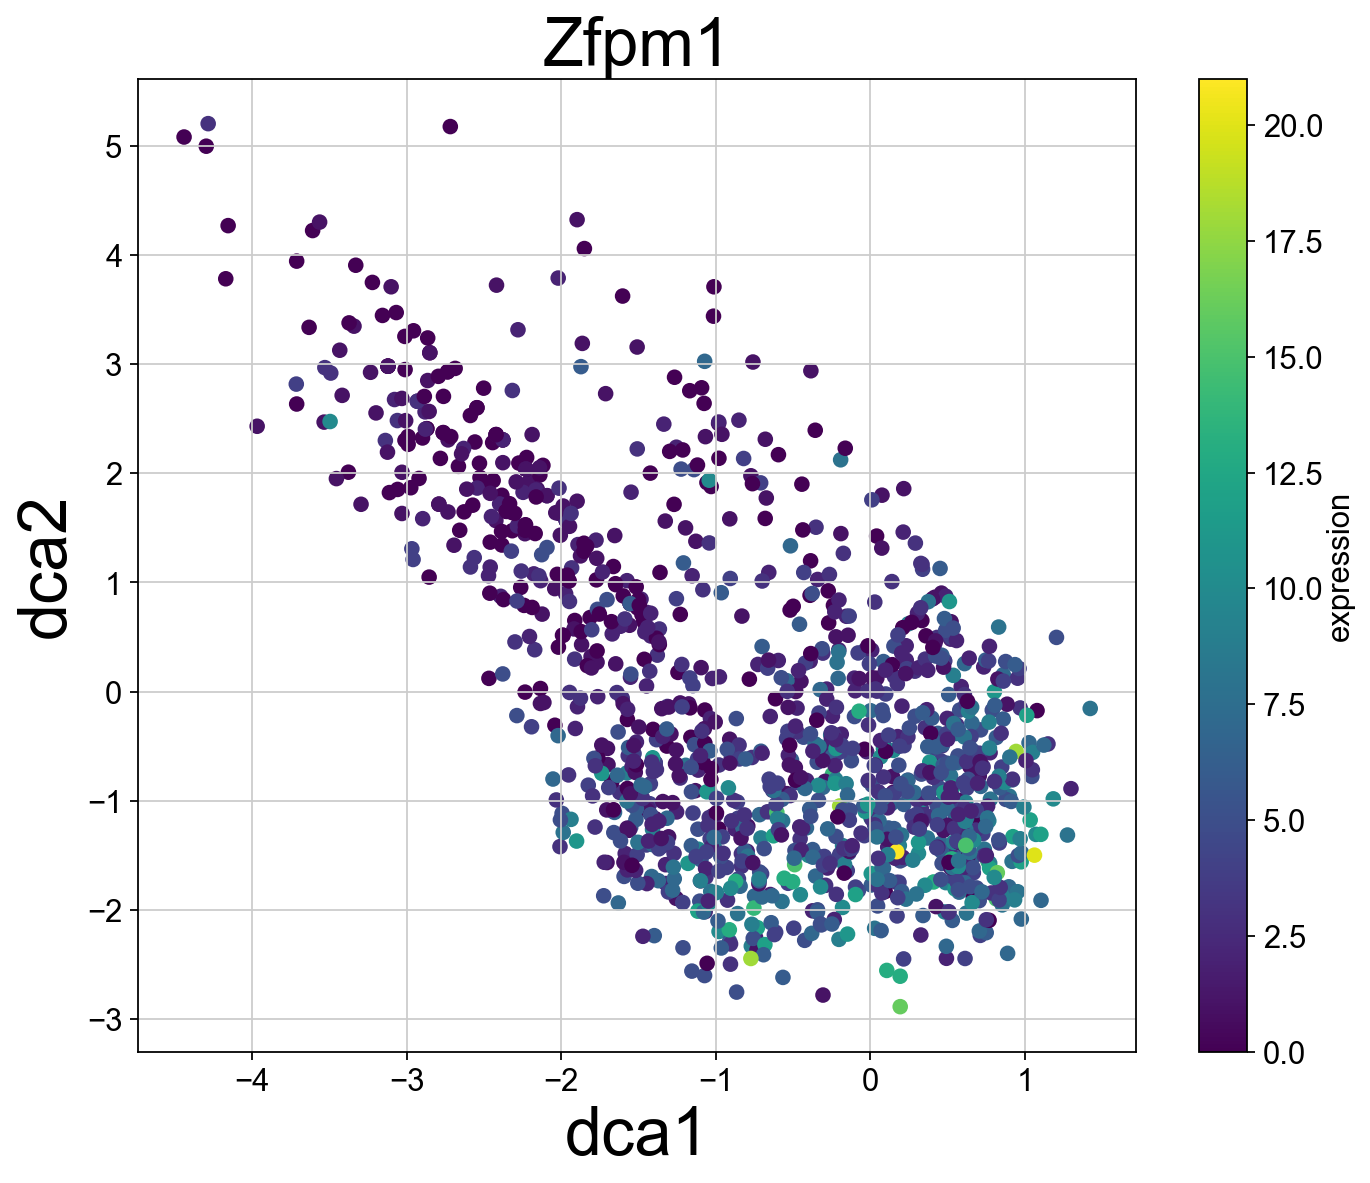

In [16]:
dv.enrich_plot_marker(result=res1, tf_name="CMYB_01", gene="Zfpm1", count=count1, save=False)